In [55]:
import torch
import torch.nn.functional as F
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

print("Libraries imported successfully!")


Libraries imported successfully!


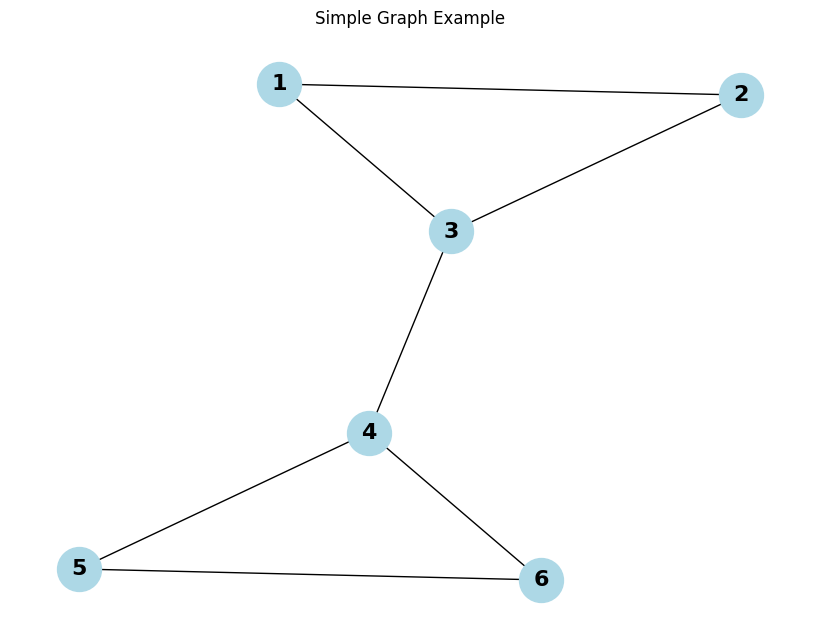

Number of nodes: 6
Number of edges: 7
Average degree: 2.33
Clustering coefficient: 0.778


In [56]:
# Create a simple graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (4, 6)])

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=16, font_weight='bold')
plt.title("Simple Graph Example")
plt.show()

# Basic graph statistics
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"Clustering coefficient: {nx.average_clustering(G):.3f}")


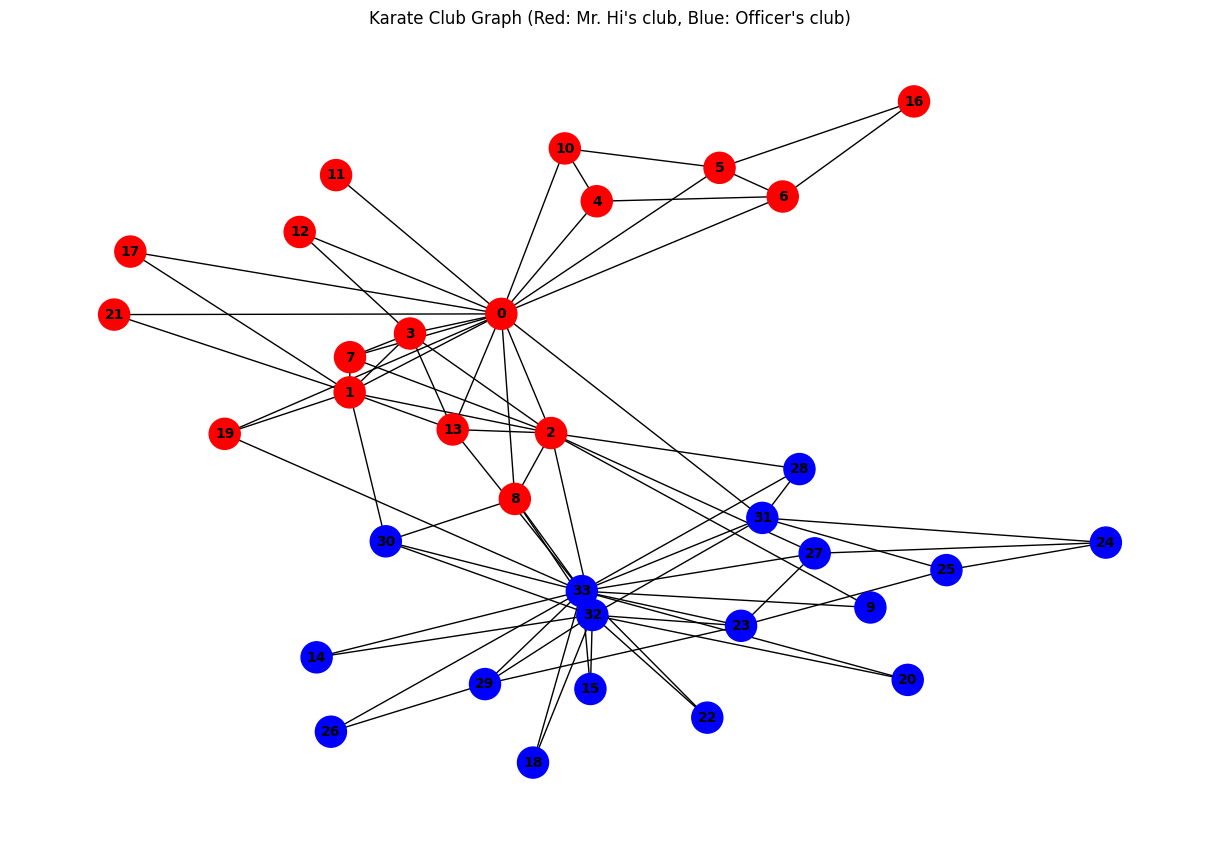

Nodes: 34
Edges: 78
Density: 0.139
Average clustering: 0.571

PyTorch Geometric format:
Data: Data(x=[34, 16], edge_index=[2, 156], y=[34])
Node features shape: torch.Size([34, 16])
Edge index shape: torch.Size([2, 156])
Labels shape: torch.Size([34])


In [57]:
# Load the famous Karate Club graph
karate = nx.karate_club_graph()

# Visualize with community coloring
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(karate)

# Color nodes by their club membership
colors = ['red' if karate.nodes[node]['club'] == 'Mr. Hi' else 'blue' 
          for node in karate.nodes()]

nx.draw(karate, pos, node_color=colors, with_labels=True, 
        node_size=500, font_size=10, font_weight='bold')
plt.title("Karate Club Graph (Red: Mr. Hi's club, Blue: Officer's club)")
plt.show()

# Graph metrics
print(f"Nodes: {karate.number_of_nodes()}")
print(f"Edges: {karate.number_of_edges()}")
print(f"Density: {nx.density(karate):.3f}")
print(f"Average clustering: {nx.average_clustering(karate):.3f}")

# Quick PyTorch Geometric conversion example
edge_list = list(karate.edges())
edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
# Add reverse edges for undirected graph
edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

# Create random node features
x = torch.randn(karate.number_of_nodes(), 16)

# Create binary labels based on club membership
y = torch.tensor([0 if karate.nodes[node]['club'] == 'Mr. Hi' else 1 
                 for node in karate.nodes()], dtype=torch.long)

karate_pyg = Data(x=x, edge_index=edge_index, y=y)
print(f"\nPyTorch Geometric format:")
print(f"Data: {karate_pyg}")
print(f"Node features shape: {karate_pyg.x.shape}")
print(f"Edge index shape: {karate_pyg.edge_index.shape}")
print(f"Labels shape: {karate_pyg.y.shape}")
